<a href="https://colab.research.google.com/github/LuciaArias03/ProyectoDSParteI-Arias/blob/main/Data_StoryTelling%2BArias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 **Pondremos a prueba las habilidades de regresión diseñando un algoritmo para predecir con precisión los precios de las viviendas en India.**

Quizas haya compradores que no les importa solamente el tamaño de la casa; existen otros factores clave para decidir el precio de una casa o propiedad. Puede ser extremadamente difícil determinar el conjunto correcto de atributos que contribuyen a comprender el comportamiento del comprador.

En la India, La "aprobación RERA" se refiere a la aprobación de un proyecto inmobiliario según la Ley de Regulación Inmobiliaria (RERA), lo que significa que el proyecto cumple con los criterios legales, financieros y operativos establecidos por el gobierno para garantizar la transparencia, la entrega a tiempo y el cumplimiento de las normativas, protegiendo los intereses de los compradores de viviendas.

🧠 **Hipótesis**

El tamaño de la propiedad (en pies cuadrados) es el factor más influyente en el precio de la casa.

La ubicación geográfica de una casa afecta directamente su precio.

Las características adicionales como la condición de "lista para mudarse" o la aprobación por RERA aumentan el valor de la propiedad.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

file_path = '/content/drive/MyDrive/Data_StoryTelling+Arias/train.csv'

try:
    df_train = pd.read_csv(file_path)
    # Muestra las primeras 5 filas para verificar.
    print("\nPrimeras 5 filas del DataFrame de entrenamiento:")
    print(df_train.head())

    # Muestra información general sobre el DataFrame.
    print("\nInformación del DataFrame:")
    df_train.info()

except FileNotFoundError:
    print(f"Error: El archivo '{file_path}' no se encuentra en la sesión de Colab. Asegúrate de haberlo subido correctamente y de que el nombre coincide.")


Primeras 5 filas del DataFrame de entrenamiento:
  POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0     Owner                   0     0        2       BHK  1300.236407   
1    Dealer                   0     0        2       BHK  1275.000000   
2     Owner                   0     0        2       BHK   933.159722   
3     Owner                   0     1        2       BHK   929.921143   
4    Dealer                   1     0        2       BHK   999.009247   

   READY_TO_MOVE  RESALE                      ADDRESS  LONGITUDE   LATITUDE  \
0              1       1        Ksfc Layout,Bangalore  12.969910  77.597960   
1              1       1    Vishweshwara Nagar,Mysore  12.274538  76.644605   
2              1       1             Jigani,Bangalore  12.778033  77.632191   
3              1       1  Sector-1 Vaishali,Ghaziabad  28.642300  77.344500   
4              0       1             New Town,Kolkata  22.592200  88.484911   

   TARGET(PRICE_IN_LACS)  
0        

In [2]:
# df_train es el DataFrame que creaste al leer 'train.csv'
# Muestra información sobre el DataFrame
print(df_train.info())

# Muestra las primeras 5 filas para una inspección visual
print(df_train.head())

# Cuenta el número de valores nulos por columna
print("\nValores nulos por columna:")
print(df_train.isnull().sum())

# Opcional: Para ver el porcentaje de valores faltantes
print("\nPorcentaje de valores nulos:")
total_rows = len(df_train)
null_percentage = (df_train.isnull().sum() / total_rows) * 100
print(null_percentage.sort_values(ascending=False))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB
None
  POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0     Owner            

El conjunto de datos contiene 29,451 entradas y 12 columnas. El aspecto más importante es que no hay valores nulos en ninguna columna, lo que nos permite saltar la etapa de imputación de datos. Esto simplifica enormemente el proceso.

In [3]:
duplicate_rows = df_train.duplicated()

# Cuenta el número total de duplicados
num_duplicates = duplicate_rows.sum()

print(f"El número total de filas duplicadas en el DataFrame es: {num_duplicates}")

# Para ver las filas duplicadas, puedes filtrar el DataFrame
if num_duplicates > 0:
    print("\nEjemplo de filas duplicadas:")
    print(df_train[duplicate_rows].head())
else:
    print("\nNo se encontraron filas duplicadas.")

El número total de filas duplicadas en el DataFrame es: 401

Ejemplo de filas duplicadas:
     POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
1904    Dealer                   1     0        3       BHK  1209.628644   
2351    Dealer                   0     0        2       BHK   896.680112   
2611    Dealer                   0     0        3       BHK  1350.256549   
2618    Dealer                   1     0        2       BHK   800.000000   
3211     Owner                   0     0        2       BHK   712.105799   

      READY_TO_MOVE  RESALE                        ADDRESS  LONGITUDE  \
1904              0       1              Salt Lake,Kolkata  22.541110   
2351              1       1            Zirakpur,Chandigarh  30.662283   
2611              1       1  Sector 78 Faridabad,Faridabad  28.380160   
2618              0       1           Chandapura,Bangalore  12.800090   
3211              1       1              BataNagar,Kolkata  22.506860   

       LATITUD

Estos 401 duplicados que se encontraron pueden sesgar los resultados y hacer que el modelo parezca más preciso de lo que realmente es. Una buena práctica en el data wrangling es eliminar estos duplicados antes de cualquier análisis o modelado serio.

In [4]:
# Elimina las filas duplicadas del DataFrame
df_train.drop_duplicates(inplace=True)

print(f"Número de filas después de eliminar duplicados: {len(df_train)}")

Número de filas después de eliminar duplicados: 29050


Conteo de propiedades por anunciante:
POSTED_BY
Dealer     17961
Owner      10470
Builder      619
Name: count, dtype: int64


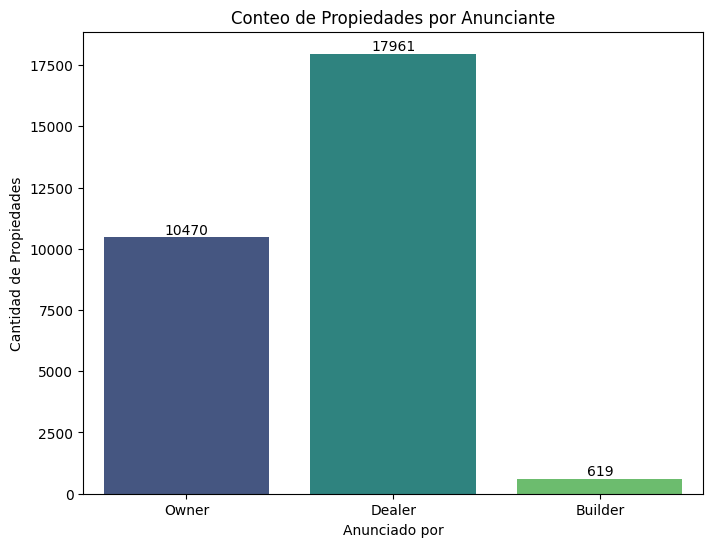

In [5]:
df_train.drop_duplicates(inplace=True)

# Contar el número de propiedades por anunciante
posted_by_counts = df_train['POSTED_BY'].value_counts()

print("Conteo de propiedades por anunciante:")
print(posted_by_counts)

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='POSTED_BY', data=df_train, hue='POSTED_BY', palette='viridis', legend=False)
plt.title('Conteo de Propiedades por Anunciante')
plt.xlabel('Anunciado por')
plt.ylabel('Cantidad de Propiedades')

# Añadir las etiquetas de texto en la parte superior de cada barra
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

📊 Los resultados revelan que quienes buscan vender sus propiedades prefieren contactar con un agente inmobiliario para publicar su vivienda.
En segundo lugar el propietario la publica por sus propios medios.
Por último, en menor medida, la empresa constructora publica el inmueble a vender.

Conteo de propiedades por número de habitaciones:
BHK_NO.
1      3540
2     13164
3     10365
4      1698
5       189
6        52
7        11
8        10
9         3
10        4
11        1
12        3
13        1
15        4
17        1
20        4
Name: count, dtype: int64


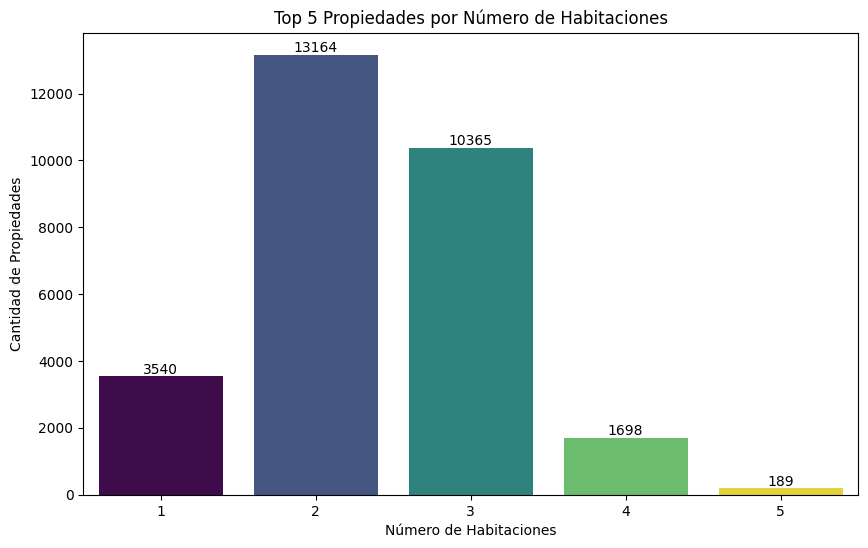

In [6]:

df_train.drop_duplicates(inplace=True)

# Contar el número de propiedades por cantidad de habitaciones
bhk_counts = df_train['BHK_NO.'].value_counts().sort_index()

print("Conteo de propiedades por número de habitaciones:")
print(bhk_counts)

# Contar el número de propiedades por cantidad de habitaciones y ordenar
bhk_counts = df_train['BHK_NO.'].value_counts().nlargest(5).sort_index()

# Crear un DataFrame a partir de los 5 primeros conteos para el gráfico
bhk_df_top5 = bhk_counts.reset_index()
bhk_df_top5.columns = ['BHK_NO.', 'count']

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='BHK_NO.', y='count', data=bhk_df_top5, palette='viridis', hue='BHK_NO.', legend=False)
plt.title('Top 5 Propiedades por Número de Habitaciones')
plt.xlabel('Número de Habitaciones')
plt.ylabel('Cantidad de Propiedades')

# Añadir las etiquetas de texto en la parte superior de cada barra
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

📊 En este TOP 5, vemos que la gran mayoria de las viviendas son de 2 y 3 ambientes, pero ya podriamos estar viendo valores atípicos que tendremos que tratar.

El coeficiente de correlación entre el tamaño y el precio es: 0.41


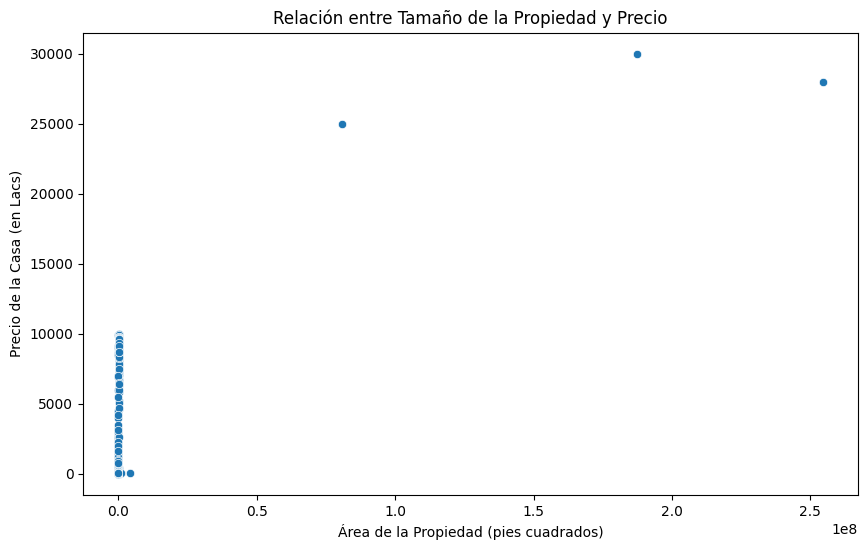

In [7]:
# 1. Calcular el coeficiente de correlación
# Usamos el método .corr() de pandas
correlation = df_train['SQUARE_FT'].corr(df_train['TARGET(PRICE_IN_LACS)'])
print(f"El coeficiente de correlación entre el tamaño y el precio es: {correlation:.2f}")

# 2. Crear un gráfico de dispersión para visualizar la relación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SQUARE_FT', y='TARGET(PRICE_IN_LACS)', data=df_train)
plt.title('Relación entre Tamaño de la Propiedad y Precio')
plt.xlabel('Área de la Propiedad (pies cuadrados)')
plt.ylabel('Precio de la Casa (en Lacs)')
plt.show()

Cuantos mas metros cuadrados tiene la propiedad, el precio tiende a aumentar. Aun que esto es un factor importante, no es el único ni el más influyente. Otros factores como la ubicación, la condición, o el tipo de propiedad también juegan un papel crucial en la determinación del precio.

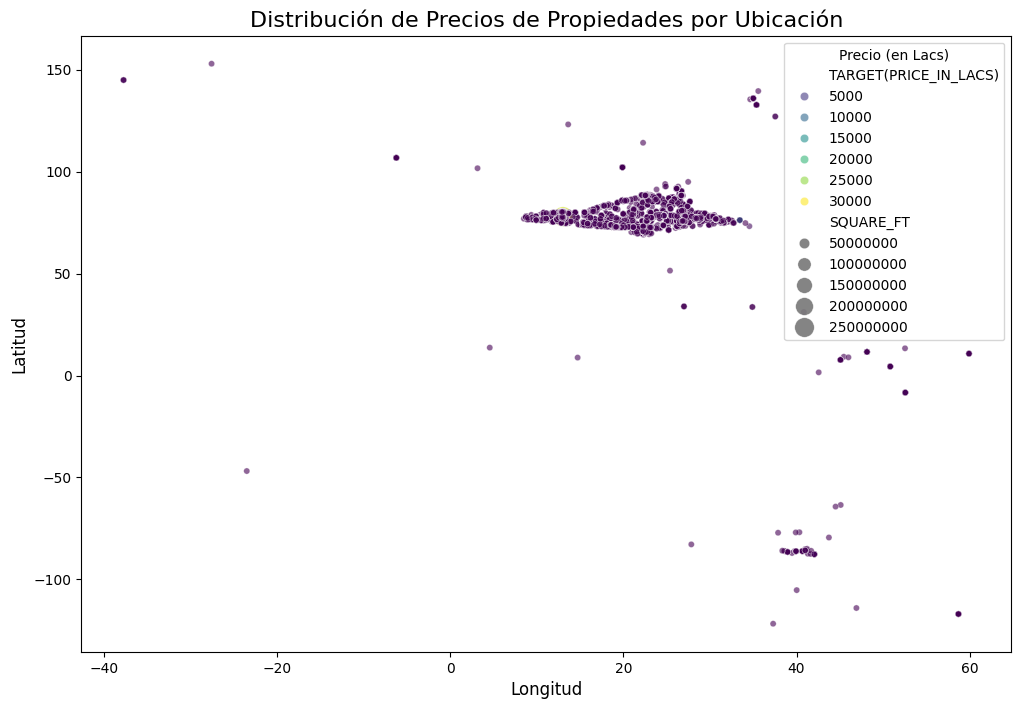

In [8]:
# Crear el gráfico de dispersión
# Usamos 'SQUARE_FT' como tamaño del punto y el precio como color para un análisis más profundo.
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='LONGITUDE',
    y='LATITUDE',
    data=df_train,
    hue='TARGET(PRICE_IN_LACS)',  # Color del punto según el precio
    size='SQUARE_FT',            # Tamaño del punto según el área
    sizes=(20, 200),             # Rango de tamaño de los puntos
    palette='viridis',           # Paleta de colores
    alpha=0.6                    # Transparencia
)

plt.title('Distribución de Precios de Propiedades por Ubicación', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.legend(title='Precio (en Lacs)')
plt.show()

Estadísticas del precio de las propiedades:
count    29050.000000
mean       141.712677
std        650.055763
min          0.250000
25%         38.000000
50%         61.750000
75%        100.000000
max      30000.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64


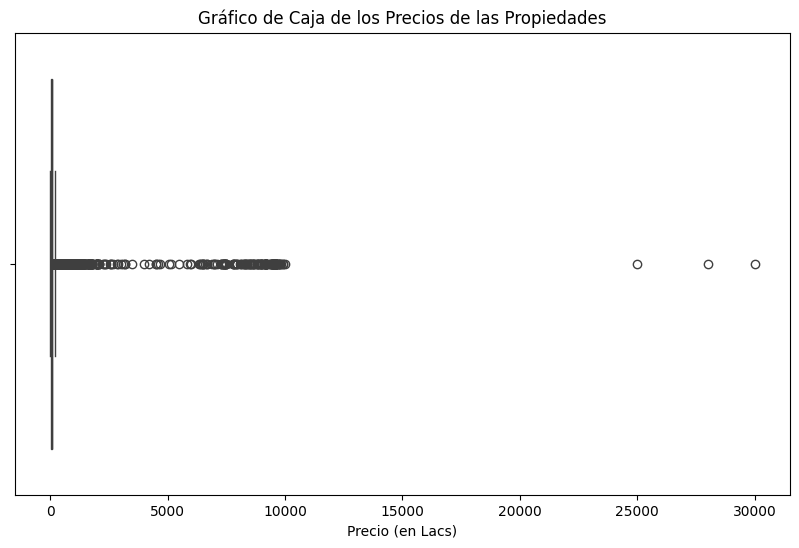

In [9]:
# Nombre de la columna de precios
price_column = 'TARGET(PRICE_IN_LACS)'

# 1. Mostrar estadísticas descriptivas del precio
print("Estadísticas del precio de las propiedades:")
print(df_train[price_column].describe())

# 2. Crear un gráfico de caja para visualizar la distribución
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train[price_column])
plt.title('Gráfico de Caja de los Precios de las Propiedades')
plt.xlabel('Precio (en Lacs)')
plt.show()

Los resultados de las estadísticas del precio (TARGET(PRICE_IN_LACS)) muestran la existencia de valores atípicos extremos en el conjunto de datos.

Esto significa que el 75% de todas las propiedades tienen un precio igual o menor a 100 lakhs, mientras que la propiedad más cara cuesta 30.000 lakhs, un valor 300 veces mayor que el 75% de los datos. Esta disparidad tan grande distorsiona la escala de color.

Tendre que transformar la variable de precio usando una función logarítmica. Esta transformación reduce la magnitud de los valores más altos sin perder la información sobre su relación con las otras variables.

Estadísticas del precio transformado (log):
count    29050.000000
mean         4.230121
std          0.883316
min          0.223144
25%          3.663562
50%          4.139158
75%          4.615121
max         10.308986
Name: TARGET(PRICE_IN_LACS)_log, dtype: float64


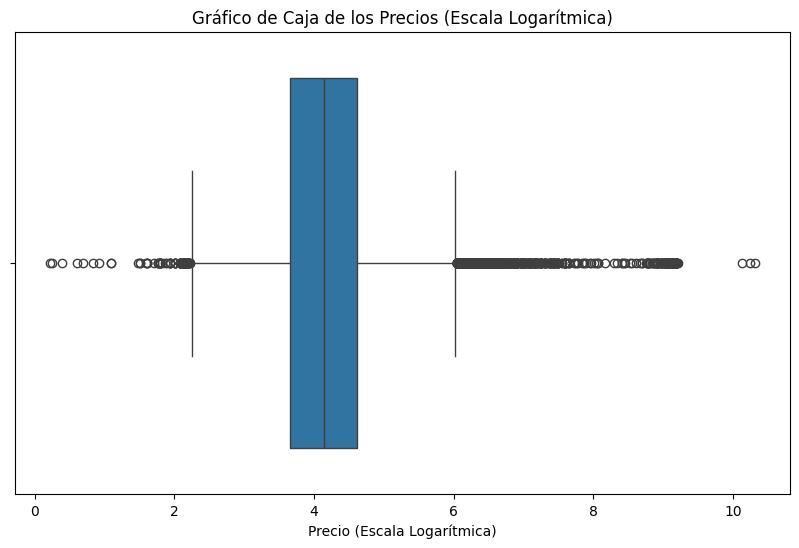

In [10]:
# Aplicar la transformación logarítmica a la columna de precios
# Usamos np.log1p para evitar errores con valores de 0
df_train['TARGET(PRICE_IN_LACS)_log'] = np.log1p(df_train['TARGET(PRICE_IN_LACS)'])

# Ahora, analiza la distribución de la nueva variable transformada
print("Estadísticas del precio transformado (log):")
print(df_train['TARGET(PRICE_IN_LACS)_log'].describe())

# Visualiza la nueva distribución con un box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train['TARGET(PRICE_IN_LACS)_log'])
plt.title('Gráfico de Caja de los Precios (Escala Logarítmica)')
plt.xlabel('Precio (Escala Logarítmica)')
plt.show()

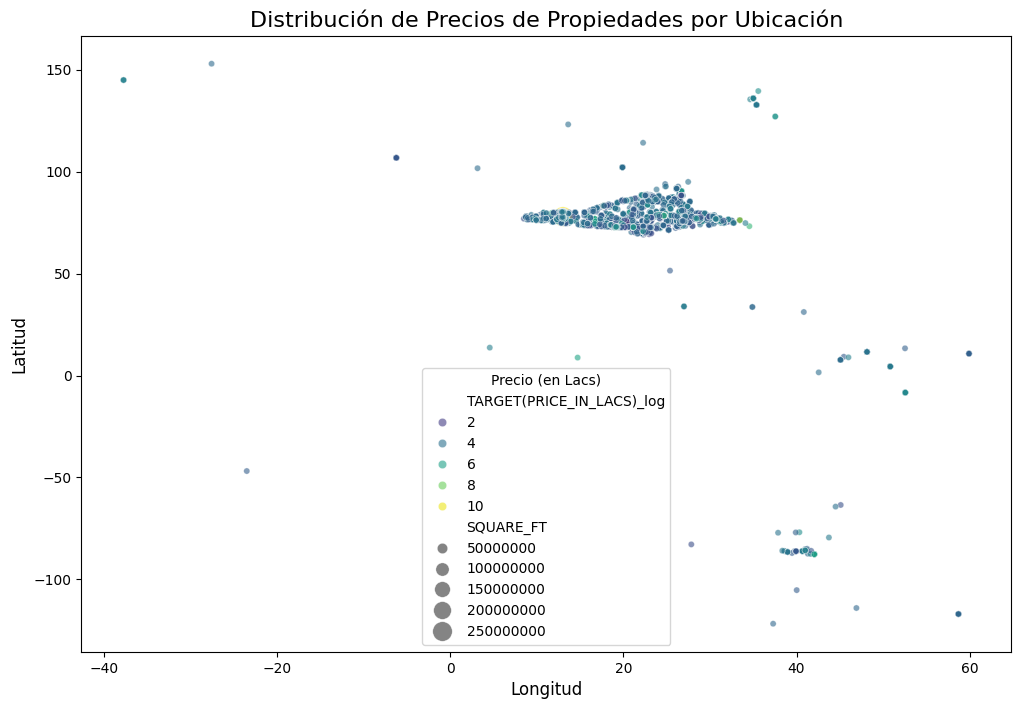

In [11]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='LONGITUDE',
    y='LATITUDE',
    data=df_train,
    hue='TARGET(PRICE_IN_LACS)_log',  # Color del punto según el precio
    size='SQUARE_FT',            # Tamaño del punto según el área
    sizes=(20, 200),             # Rango de tamaño de los puntos
    palette='viridis',           # Paleta de colores
    alpha=0.6                    # Transparencia
)

plt.title('Distribución de Precios de Propiedades por Ubicación', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.legend(title='Precio (en Lacs)')
plt.show()

🚀 La transformación logarítmica ha "normalizado" los datos, lo que significa que la mayoría de los valores se concentran alrededor de la media (los tonos azules y celestes), mientras que los valores extremos (los precios más altos) son mucho menos comunes y, por lo tanto, se muestran con los tonos amarillos.

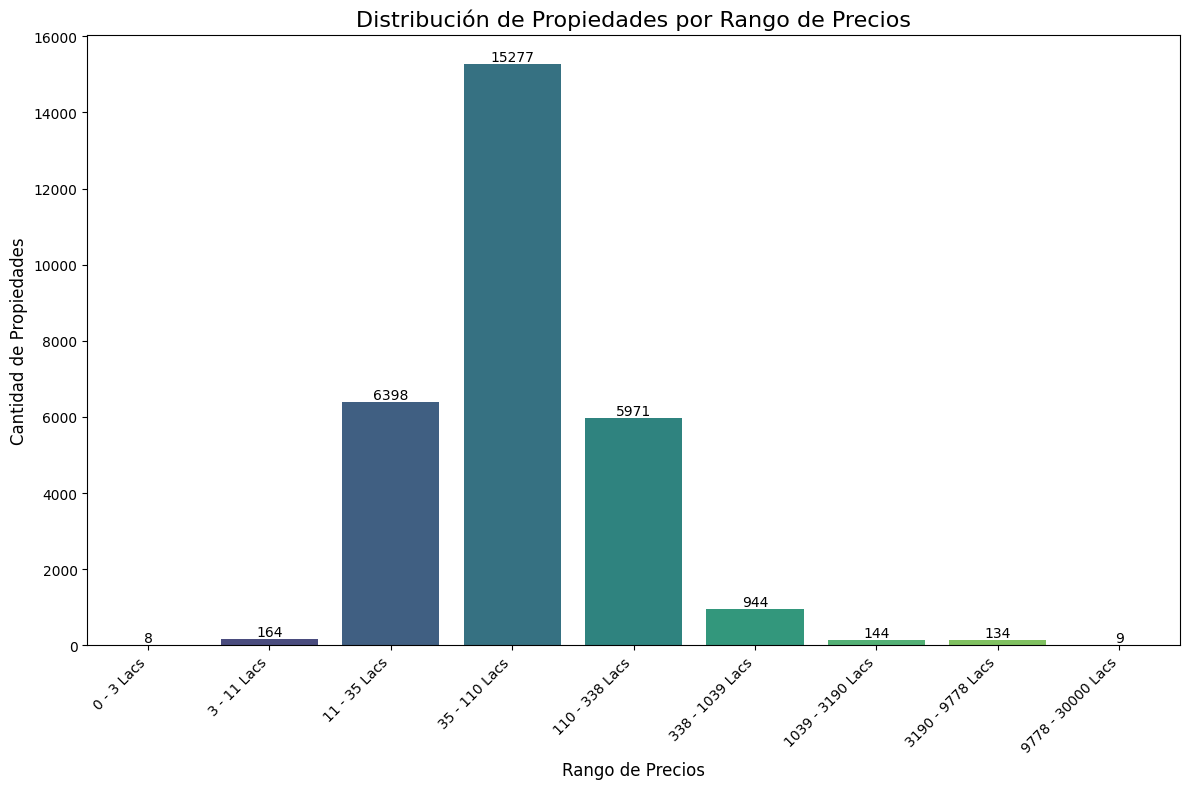

In [27]:

df_train.drop_duplicates(inplace=True)
df_train['TARGET(PRICE_IN_LACS)_log'] = np.log1p(df_train['TARGET(PRICE_IN_LACS)'])

# Crear rangos de precios y contar cuántas propiedades caen en cada uno
bins = np.linspace(df_train['TARGET(PRICE_IN_LACS)_log'].min(), df_train['TARGET(PRICE_IN_LACS)_log'].max(), 10)
price_distribution = pd.cut(df_train['TARGET(PRICE_IN_LACS)_log'], bins=bins).value_counts().sort_index()

# Convertir la serie a un DataFrame para el gráfico
price_distribution_df = price_distribution.reset_index()
price_distribution_df.columns = ['Price_Range', 'Count']

# --- Aquí está la clave ---
# Revertir la transformación logarítmica para crear etiquetas legibles en lakhs
price_ranges_original = [
    f'{np.expm1(interval.left):.0f} - {np.expm1(interval.right):.0f} Lacs'
    for interval in price_distribution_df['Price_Range']
]
# Asignar las nuevas etiquetas al DataFrame
price_distribution_df['Price_Range'] = price_ranges_original

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Price_Range',
    y='Count',
    data=price_distribution_df,
    palette='viridis',
    hue='Price_Range',
    legend=False
)

# Añadir las etiquetas de texto en la parte superior de cada barra
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Distribución de Propiedades por Rango de Precios', fontsize=16)
plt.xlabel('Rango de Precios', fontsize=12)
plt.ylabel('Cantidad de Propiedades', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Mostrar el rango de precios en lakhs hace que el gráfico sea mucho más fácil de entender

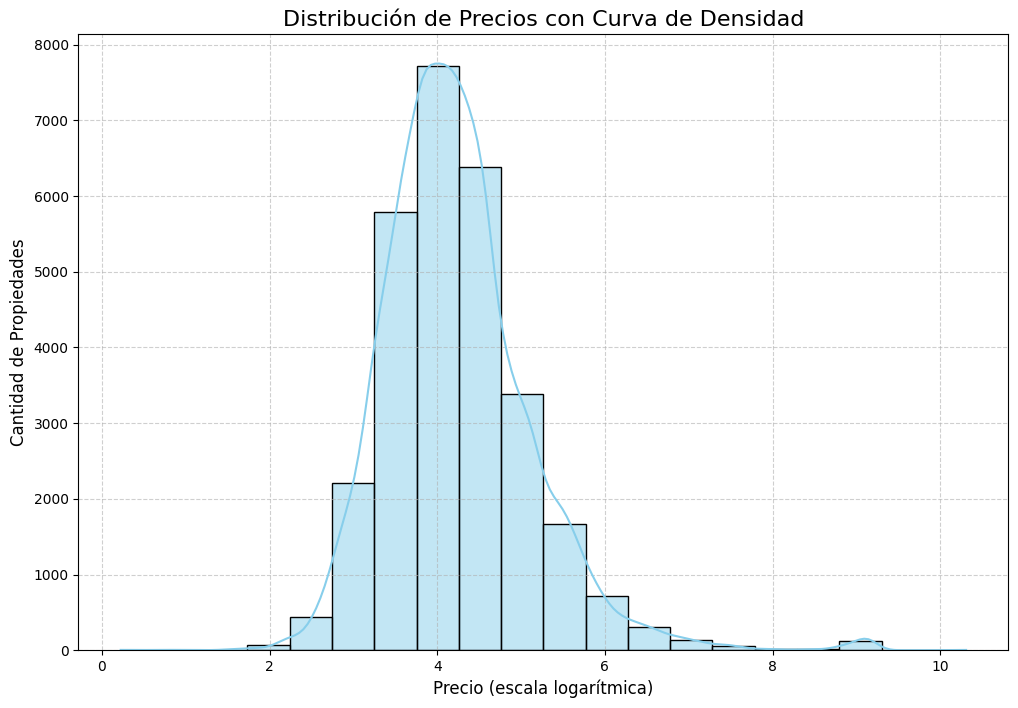

In [26]:
df_train.drop_duplicates(inplace=True)
df_train['TARGET(PRICE_IN_LACS)_log'] = np.log1p(df_train['TARGET(PRICE_IN_LACS)'])

# Crear el histograma con la curva de densidad
plt.figure(figsize=(12, 8))
sns.histplot(
    x='TARGET(PRICE_IN_LACS)_log',
    data=df_train,
    kde=True,  # <--- Esta es la clave para la curva de distribucion
    bins=20,   # Puedes ajustar el numero de barras para mayor detalle
    color='skyblue'
)

plt.title('Distribución de Precios con Curva de Densidad', fontsize=16)
plt.xlabel('Precio (escala logarítmica)', fontsize=12)
plt.ylabel('Cantidad de Propiedades', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Inicialmente, la distribución de los precios de las propiedades era muy desigual, con la mayoría concentrada en el rango bajo y unos pocos precios extremadamente altos (valores atípicos) que distorsionaban el análisis. Para resolver esto, aplicamos una transformación logarítmica. Este proceso comprimió los valores más altos y estiró los más bajos, lo que resultó en una distribución más equilibrada y similar a una campana.

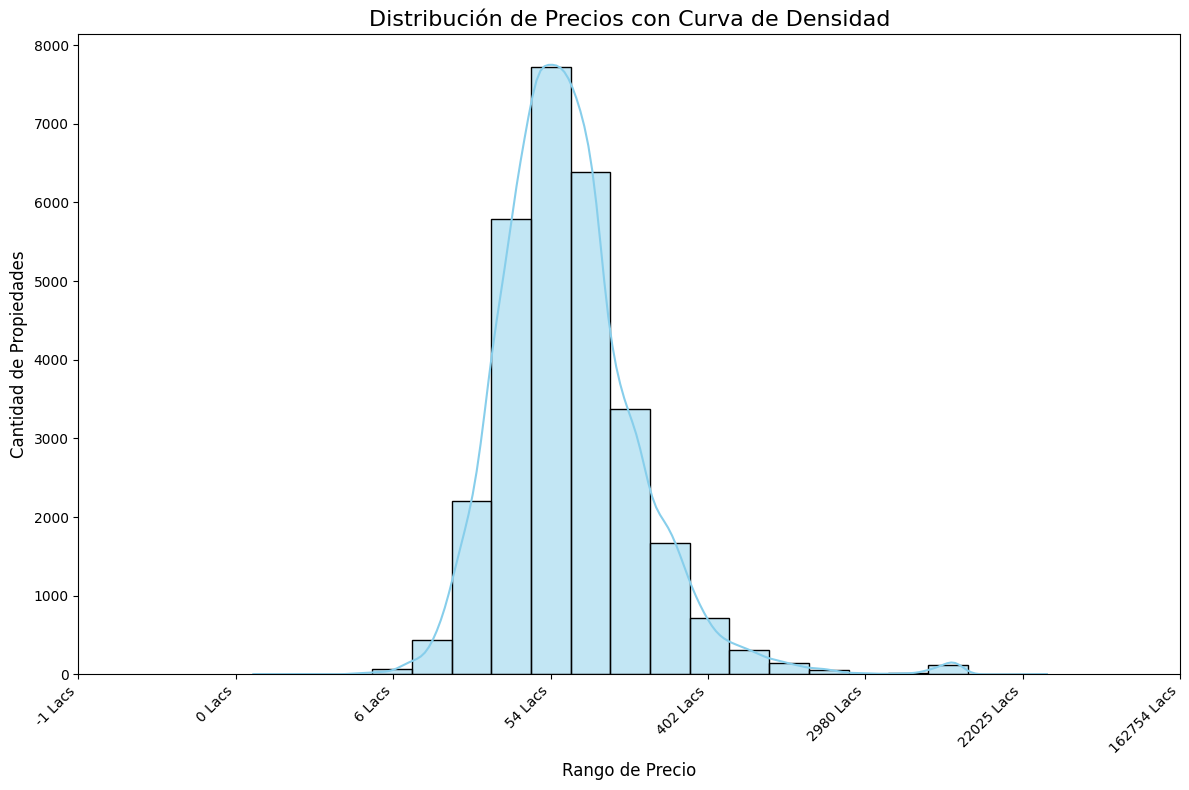

In [30]:
df_train.drop_duplicates(inplace=True)
df_train['TARGET(PRICE_IN_LACS)_log'] = np.log1p(df_train['TARGET(PRICE_IN_LACS)'])

# Crear el histograma con la curva de densidad
plt.figure(figsize=(12, 8))
ax = sns.histplot(
    x='TARGET(PRICE_IN_LACS)_log',
    data=df_train,
    kde=True,
    bins=20, # Usar 20 bins para una visualizacion mas detallada
    color='skyblue'
)

# --- Corrección aquí ---
# Obtener las posiciones de los ticks que el gráfico creó automáticamente
tick_locs = ax.get_xticks()

# Revertir la transformación logarítmica para obtener los valores en lakhs
lakhs_values = np.expm1(tick_locs)

# Crear las etiquetas en un formato legible (ej. "10 Lacs")
labels = [f'{val:.0f} Lacs' for val in lakhs_values]

# Establecer las nuevas etiquetas en el eje X
ax.set_xticks(tick_locs)
ax.set_xticklabels(labels, rotation=45, ha='right')

# Título y etiquetas
plt.title('Distribución de Precios con Curva de Densidad', fontsize=16)
plt.xlabel('Rango de Precio', fontsize=12)
plt.ylabel('Cantidad de Propiedades', fontsize=12)
plt.tight_layout()
plt.show()

Es importante recordar que 1 lakh equivale a 100,000 rupias indias (INR). Esto nos permite presentar una visualización que es precisa desde el punto de vista técnico y clara para una audiencia no especializada.

In [12]:
df_train.drop_duplicates(inplace=True)
df_train['TARGET(PRICE_IN_LACS)_log'] = np.log1p(df_train['TARGET(PRICE_IN_LACS)'])

# Calcula la correlación de Pearson y el valor p
corr, p_value = pearsonr(df_train['BHK_NO.'], df_train['TARGET(PRICE_IN_LACS)_log'])

print(f"Coeficiente de correlación de Pearson (r): {corr:.4f}")
print(f"Valor p (P-value): {p_value:.4f}")

Coeficiente de correlación de Pearson (r): 0.4807
Valor p (P-value): 0.0000


Otro analisis que se puede abordar relaciona el número de habitaciones de la propiedad ('BHK_NO.') con el pricio de la misma.

r=0.4807 significa que a medida que el número de habitaciones aumenta, el precio de la propiedad también tiende a subir. Es un hallazgo esperado, ya que las propiedades más grandes y con más habitaciones suelen tener un mayor valor en el mercado.

Valor p (P-value): 0.0000 significa que este resultado es estadísticamente muy significativo. Puedes estar muy seguro de que la relación entre el número de habitaciones y el precio es real y no una simple coincidencia.


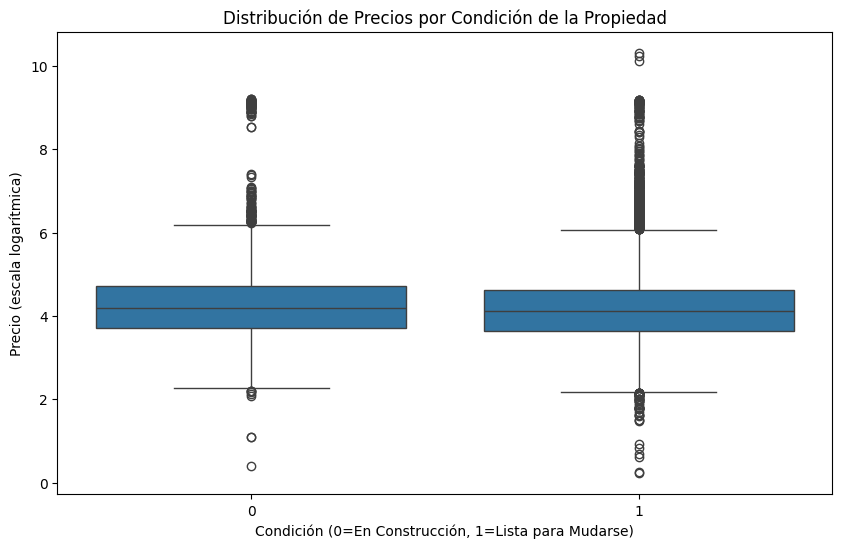

--- Análisis de READY_TO_MOVE ---
Estadísticas para propiedades listas para mudarse (1):
count    23851.000000
mean         4.210893
std          0.865881
min          0.223144
25%          3.637586
50%          4.110874
75%          4.615121
max         10.308986
Name: TARGET(PRICE_IN_LACS)_log, dtype: float64

Estadísticas para propiedades en construcción (0):
count    5199.000000
mean        4.318335
std         0.954383
min         0.392042
25%         3.713572
50%         4.198705
75%         4.709530
max         9.209440
Name: TARGET(PRICE_IN_LACS)_log, dtype: float64


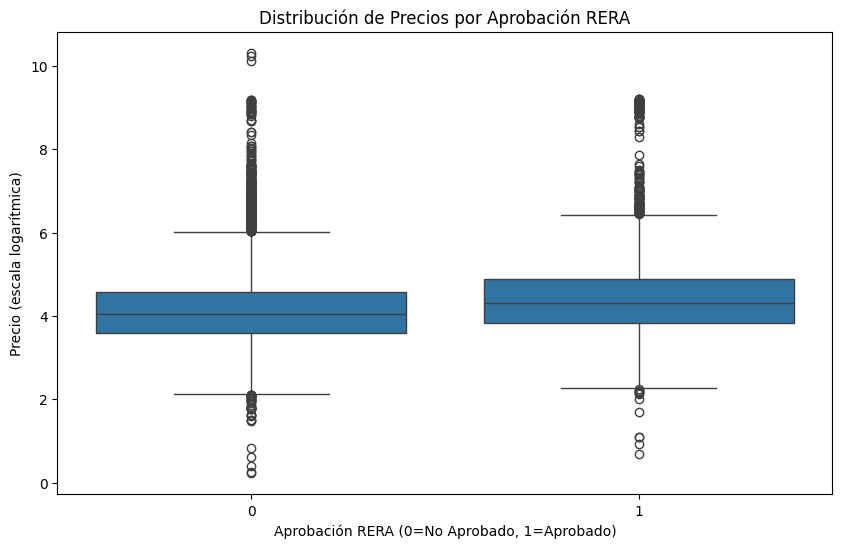


--- Análisis de RERA ---
Estadísticas para propiedades con RERA (1):
count    9176.000000
mean        4.417566
std         0.928850
min         0.693147
25%         3.828641
50%         4.317488
75%         4.875197
max         9.209440
Name: TARGET(PRICE_IN_LACS)_log, dtype: float64

Estadísticas para propiedades sin RERA (0):
count    19874.000000
mean         4.143577
std          0.847630
min          0.223144
25%          3.583519
50%          4.043051
75%          4.564348
max         10.308986
Name: TARGET(PRICE_IN_LACS)_log, dtype: float64


In [13]:
# Análisis de READY_TO_MOVE vs UNDER_CONSTRUCTION
# --- Visualización del Gráfico de Caja ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='READY_TO_MOVE', y='TARGET(PRICE_IN_LACS)_log', data=df_train)
plt.title('Distribución de Precios por Condición de la Propiedad')
plt.xlabel('Condición (0=En Construcción, 1=Lista para Mudarse)')
plt.ylabel('Precio (escala logarítmica)')
plt.show()

# --- Estadísticas en Texto ---
print("--- Análisis de READY_TO_MOVE ---")
df_ready = df_train[df_train['READY_TO_MOVE'] == 1]['TARGET(PRICE_IN_LACS)_log']
df_under_con = df_train[df_train['READY_TO_MOVE'] == 0]['TARGET(PRICE_IN_LACS)_log']

print("Estadísticas para propiedades listas para mudarse (1):")
print(df_ready.describe())
print("\nEstadísticas para propiedades en construcción (0):")
print(df_under_con.describe())

# Análisis de RERA
# --- Visualización del Gráfico de Caja ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='RERA', y='TARGET(PRICE_IN_LACS)_log', data=df_train)
plt.title('Distribución de Precios por Aprobación RERA')
plt.xlabel('Aprobación RERA (0=No Aprobado, 1=Aprobado)')
plt.ylabel('Precio (escala logarítmica)')
plt.show()

# --- Estadísticas en Texto ---
print("\n--- Análisis de RERA ---")
df_rera_yes = df_train[df_train['RERA'] == 1]['TARGET(PRICE_IN_LACS)_log']
df_rera_no = df_train[df_train['RERA'] == 0]['TARGET(PRICE_IN_LACS)_log']

print("Estadísticas para propiedades con RERA (1):")
print(df_rera_yes.describe())
print("\nEstadísticas para propiedades sin RERA (0):")
print(df_rera_no.describe())

📝 Las características "lista para mudarse" y la aprobación RERA sí tienen un impacto en el precio de las propiedades.

Curiosamente, las propiedades en construcción tienen un precio mediano ligeramente más alto que las propiedades listas para mudarse. Esto contradice lo que se podría pensar intuitivamente, pero puede deberse a que las propiedades en construcción a menudo son parte de proyectos nuevos y más modernos.

La mediana del precio de las propiedades con aprobación RERA es de 4.32, mientras que la de las propiedades sin aprobación RERA es de 4.04.

La aprobación RERA está claramente asociada con precios más altos. La diferencia en las medianas es significativa. Esto tiene sentido, ya que RERA es una regulación que brinda seguridad a los compradores, lo que les da una mayor confianza para pagar más por una propiedad.

✅ **Conclusión preliminares del Proyecto**

Estos resultados validan el análisis exploratorio:

La transformación logarítmica normalizó la distribución de los precios.

La mayoría de las propiedades se concentran en un rango de precios específico.

Los valores extremos han disminuido, lo que te permite trabajar con un conjunto de datos más robusto.

🧠 **¿Siguiente paso: Construcción y optimización de modelos de machine learning?**
